In [1]:
#import h5py
#import galaxychop as gchop
#import uttr
#import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import pickle

# Leo las galaxias

In [2]:
df_gal01 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal01.pkl')
df_gal02 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal02.pkl')
df_gal03 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal03.pkl')
df_gal04 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal04.pkl')
df_gal05 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal05.pkl')
df_gal06 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal06.pkl')
df_gal07 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal07.pkl')
df_gal08 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal08.pkl')
df_gal09 = pd.read_pickle('../../datos_gchop_paper/pickle_agama/df_gal09.pkl')

In [3]:
print(len(df_gal01))

6250


In [4]:
df_gal01.head(3)
df_gal01.keys()

Index(['m', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'label_JThreshold',
       'label_JHistogram', 'label_JEHistogram', 'label_KMeans',
       'label_GaussianMixture', 'probs0_GaussianMixture',
       'probs1_GaussianMixture', 'label_AutoGaussianMixture',
       'probs0_AutoGaussianMixture', 'probs1_AutoGaussianMixture',
       'probs2_AutoGaussianMixture', 'probs3_AutoGaussianMixture',
       'label_Agama'],
      dtype='object')

In [5]:
df_gal01.label_JHistogram.isna().sum()

87

In [6]:
dfs01 = df_gal01[df_gal01['label_JThreshold'].notna()]
print(len(dfs01.label_JThreshold))
print(dfs01.label_JHistogram)

6163
0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
6245    0.0
6246    0.0
6247    0.0
6248    0.0
6249    0.0
Name: label_JHistogram, Length: 6163, dtype: float64


## uso solo los labels no NaN

In [7]:
dfs01 = df_gal01[df_gal01['label_JThreshold'].notna()]
dfs02 = df_gal02[df_gal02['label_JThreshold'].notna()]
dfs03 = df_gal03[df_gal03['label_JThreshold'].notna()]
dfs04 = df_gal04[df_gal04['label_JThreshold'].notna()]
dfs05 = df_gal05[df_gal05['label_JThreshold'].notna()]
dfs06 = df_gal06[df_gal06['label_JThreshold'].notna()]
dfs07 = df_gal07[df_gal07['label_JThreshold'].notna()]
dfs08 = df_gal08[df_gal08['label_JThreshold'].notna()]
dfs09 = df_gal09[df_gal09['label_JThreshold'].notna()]

# Analisis Confusion Matrix (% Particulas)

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## AGAMA vs Threshold

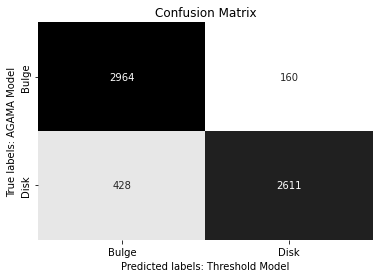

In [9]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs01.label_Agama
y_pred=dfs01.label_JThreshold   
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
sns.heatmap(cm,annot=True, cmap='binary', fmt='g', cbar=False, ax=ax)

#sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax)
#for t in ax.texts: t.set_text(t.get_text() + " %")

ax.set_ylabel('True labels: AGAMA Model');ax.set_xlabel('Predicted labels: Threshold Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk']); ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

In [10]:
y_true=dfs01.label_Agama

In [11]:
print('Negative', len(dfs01.label_Agama[dfs01.label_Agama==0]))
print('Positive', len(dfs01.label_Agama[dfs01.label_Agama==1]))

Negative 3124
Positive 3039



 
|              |Predicted  |                       |
|--------------|-----------|-----------------------|
|Tot = P+N     | Predicted Positive      | Predicted Negative  |
|--------------|-----------|-----------------------|
| Positive (Ptot)    | True Positive (TP)      | False Negative (FN)  |
| Negative  (Ntot)   | False Positive (FP)     | True Negative (TN)   |
|--------------|-----------|-----------------------|


### Precision (Positive Predictive Value PPV)
PPV = TP / (TP + FP) 

The precision is intuitively the ability of the classifier not to label a negative sample as positive.

In [ ]:
precision_score(y_true, y_pred)

### Recall (True Positive Rate TPR)
TPR = TP / Ptot = TP / (TP + FN)

The recall is intuitively the ability of the classifier to find all the positive samples.

In [ ]:
recall_score(y_true, y_pred)

# Tabla Precision

In [ ]:
df = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans'],
             index=['Agama', 'Agama', 'Agama', 'Agama','Agama', 'Agama', 'Agama', 'Agama', 'Agama'])

df0 = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans'],
             index=['Agama01', 'Agama02', 'Agama03', 'Agama04','Agama05', 'Agama06',
                    'Agama07', 'Agama08', 'Agama09'])
#------------------------------------------
def precision(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)        
    prec = precision_score(y_true, y_pred)
    return prec

def prec0(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
    
    prec_lab0=tn/(fn+tn)
    return prec_lab0
#------------------------------------------

gal = [dfs01,dfs02,dfs03,dfs04,dfs05,dfs06,dfs07,dfs08,dfs09]
model = ['label_JHistogram','label_JThreshold','label_JEHistogram','label_KMeans']


for idg,g in enumerate(gal):
    for idm, m in enumerate(model):
        
        y_true=g['label_Agama']
        #y_pred=dfs01[m]
        y_pred=g[m]
        df.iloc[idg,idm] = precision(y_true, y_pred)
        df0.iloc[idg,idm] = prec0(y_true, y_pred)
        print(idg,idm, m)
        #print(precision(y_true, y_pred),prec0(y_true, y_pred))
        


In [ ]:
pd.options.display.float_format = '{:,.3f}'.format


df_prec_bulge = df
df_prec_disk = df0
df_prec_bulge

# Tabla ReCall

In [ ]:
df = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans'],
             index=['Agama01', 'Agama02', 'Agama03', 'Agama04','Agama05', 'Agama06',
                    'Agama07', 'Agama08', 'Agama09'])
df0 = pd.DataFrame(columns=['JHistogram', 'JThreshold', 'JEHistogram', 'KMeans'],
             index=['Agama01', 'Agama02', 'Agama03', 'Agama04','Agama05', 'Agama06',
                    'Agama07', 'Agama08', 'Agama09'])
#------------------------------------------
def recall(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)        
    rec = recall_score(y_true, y_pred)
    return rec

def rec0(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
    
    rec_lab0=tn/(fp+tn)
    return rec_lab0

#------------------------------------------

gal = [dfs01,dfs02,dfs03,dfs04,dfs05,dfs06,dfs07,dfs08,dfs09]
model = ['label_JHistogram','label_JThreshold','label_JEHistogram','label_KMeans']


for idg,g in enumerate(gal):
    for idm, m in enumerate(model):
        
        y_true=g['label_Agama']
        #y_pred=dfs01[m]
        y_pred=g[m]
        df.iloc[idg,idm] = recall(y_true, y_pred) #bulge
        df0.iloc[idg,idm] = rec0(y_true, y_pred) #disk
        print(idg,idm, m)
        print(recall(y_true, y_pred),rec0(y_true, y_pred))
        

pd.options.display.float_format = '{:,.3f}'.format

df_rec_bulge = df
df_rec_disk = df0

In [ ]:
print(df_prec_bulge)
df_prec_bulge= df_prec_bulge[df_rec_bulge.columns].astype(float)
plt.figure(figsize=(8,5))
sns.heatmap(df_prec_bulge, annot=True, vmin=0, vmax=1, center=0.5, cmap='gray')
plt.title('Precision', fontsize=16)
#plt.savefig('gchop_plots/heatmap_precision.png', dpi=200)

In [ ]:
print(df_rec_bulge)
df_rec_bulge= df_rec_bulge[df_rec_bulge.columns].astype(float)

plt.figure(figsize=(8,5))
sns.heatmap(df_rec_bulge, annot=True, vmin=0, vmax=1, center=0.5, cmap='gray')
plt.title('Recall', fontsize=16)

#plt.savefig('gchop_plots/heatmap_recall.png', dpi=200)

In [ ]:
df_rec_bulge

# Plots

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(6,5))

gal = np.array([1,2,3,4,5,6,7,8,9])
JH = df_rec_bulge.iloc[:,0]*100.
JT = df_rec_bulge.iloc[:,1]*100.
JE = df_rec_bulge.iloc[:,2]*100.
KM = df_rec_bulge.iloc[:,3]*100.

ax1.plot(gal,JH,'.-',label='JHistogram')
ax1.plot(gal,JT,'.-',label='JThreshold')
ax1.plot(gal,JE,'.-',label='JEHistogram')
ax1.plot(gal,KM,'.-',label='KMeans')
ax1.set_ylim(0.0,100)
ax1.set_ylabel('Recall-Bulge')
ax1.legend()

#--------------------------------
JH = df_rec_disk.iloc[:,0]*100.
JT = df_rec_disk.iloc[:,1]*100.
JE = df_rec_disk.iloc[:,2]*100.
KM = df_rec_disk.iloc[:,3]*100.

ax2.plot(gal,JH,'.-',label='JHistogram')
ax2.plot(gal,JT,'.-',label='JThreshold')
ax2.plot(gal,JE,'.-',label='JEHistogram')
ax2.plot(gal,KM,'.-',label='KMeans')
ax2.set_ylim(0.0,100)
ax2.set_ylabel('Recall-Disk')
ax2.legend()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(6,5))

gal = np.array([1,2,3,4,5,6,7,8,9])
JH = df_prec_bulge.iloc[:,0]*100.
JT = df_prec_bulge.iloc[:,1]*100.
JE = df_prec_bulge.iloc[:,2]*100.
KM = df_prec_bulge.iloc[:,3]*100.

ax1.plot(gal,JH,'.-',label='JHistogram')
ax1.plot(gal,JT,'.-',label='JThreshold')
ax1.plot(gal,JE,'.-',label='JEHistogram')
ax1.plot(gal,KM,'.-',label='KMeans')
ax1.set_ylim(0.0,100)
ax1.set_ylabel('Purity-Bulge')
ax1.legend()

#--------------------------------
JH = df_prec_disk.iloc[:,0]*100.
JT = df_prec_disk.iloc[:,1]*100.
JE = df_prec_disk.iloc[:,2]*100.
KM = df_prec_disk.iloc[:,3]*100.

ax2.plot(gal,JH,'.-',label='JHistogram')
ax2.plot(gal,JT,'.-',label='JThreshold')
ax2.plot(gal,JE,'.-',label='JEHistogram')
ax2.plot(gal,KM,'.-',label='KMeans')
ax2.set_ylim(0.0,100)
ax2.set_ylabel('Purity-Disk')
ax2.legend()